# **Optimización - Actividad 2**
![researchgate-logo.png](https://www.uninorte.edu.co/Uninorte/images/topbar_un/headerlogo_un.png)



*   Estudiante: Alejandro Jesús Manotas Marmolejo
*   Código: 200108289



## Dixon-Price

Considere la función Dixon-Price: [enlace](https://www.sfu.ca/~ssurjano/dixonpr.html)

\begin{eqnarray}
f({\bf x}) = (x_1-1)^2 +\sum_{i=2}^n i \cdot (2 \cdot x_i^2-x_{i-1})^2 \,.
\end{eqnarray}

Deseamos resolver el problema de optimización:
\begin{eqnarray}
{\bf x}^{*} = \arg \underset{{\bf x}}{\min} \, f({\bf x})\,,
\end{eqnarray}
bajo las siguientes condiciones:

1.   Los valores de $n \in \{10^4, 10^5, 10^6, 10^7, 10^8\}$
2.   El valor inicial ${\bf x}_0$, para todos los valores de $n$ es $5 \cdot {\bf 1}_{n}$, en donde ${\bf 1}_{n}$ es un vector de dimensión $n$ cuyas componentes son todas iguales a 1.
3.   Para todos los casos, el número de iteraciones es $50$.

Usted debe:


1.   Implementar de manera eficiente el método de Newton (ej., empleando `scipy.sparse` y `numpy`)
2.   Graficar, para cada caso, la norma del gradiente a través de las iteraciones.
3.   Elabore una gráfica en donde se detalle, para cada valor de $n$, el tiempo promedio empleado en calcular el paso de Newton (ej., puede utilizar el módulo `time`).



### **Respuesta.**

In [1]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as las
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Latex
import sympy as sp
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def fun_f(n):
  f = parse_expr('+'.join([f'{i}*(2*x{i}**2-x{i-1})**2' for i in range(1,n)])) + parse_expr('(x_1-1)**2');
  return f

def fun_g(f,x):
  gf = sp.Matrix([sp.diff(f,var) for var in x]);
  return gf;

def fun_H(g,x):
  Hf = sp.Matrix([list(fun_g(fun,x)) for fun in g]);
  return Hf;

In [3]:
n = 6;
fx = fun_f(n);
display(Latex('f({\\bf x}) = '+sp.latex(fx)));

xs = sp.Matrix([f'x{i}' for i in range(1,n)]);
gx = fun_g(fx,xs);
display(Latex('\\nabla f({\\bf x}) = '+sp.latex(gx)));

Hx = fun_H(gx,xs);
display(Latex('\\nabla^2 f({\\bf x}) = '+sp.latex(Hx)));

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
def dixon_price(x,n):
  f = (x[0]-1)**2+np.sum([i*(2*x[i]**2-x[i-1])**2 for i in range(1,n)]);
  return f

def fun_gradient_Dixon(x,n,k):
  g = np.zeros(n);
  g[1:] = 8*(k+1)*x[:-1]*(2*np.power(x[:-1],2)-x[:-1]);
  g[:-1] += 2*(k+2)*x[:-1]
  g[:-1] += -(8+(k*4))*np.power(x[:-1],2)
  return g;

In [5]:
n = 10**8
xk = 5*np.ones(n);
norm_gradientK = [];
times = []
for k in range(0,50):
  gradient_k = fun_gradient_Dixon(xk,n,k);
  ini = time.time();
  norm_gradientK.append(np.linalg.norm(gradient_k));
  times.append(ini - time.time());

#Grafica de la norma del gradiente

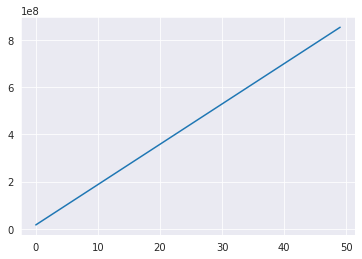

In [6]:
sns.set_style('darkgrid')
plt.plot(norm_gradientK);

#Gráfica del tiempo promedio

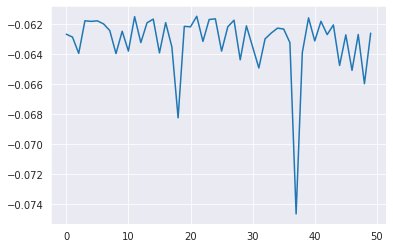

In [7]:
sns.set_style('darkgrid')
plt.plot(times);

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte:

(https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf )